In [1]:
from bs4 import BeautifulSoup

# 手刻網頁

In [2]:
html_sample = '''
<html>
    <body>
        <h1 id="title"> Hello World</h1>             #屬性id:唯一出現的大標
        <a href="#" class='link'> THIS IS LINK1</a>  #屬性class:重複出現
        <a href="#2" class='link'> THIS IS LINK2</a>
    </body>
</html>
'''

In [5]:
soup = BeautifulSoup(html_sample, 'html.parser')
soup.text


'\n\n\n Hello World\n THIS IS LINK1\n THIS IS LINK2\n\n\n'

In [6]:
type(soup)

bs4.BeautifulSoup

In [10]:
# 抓出標籤a，包成list
alink = soup.select('a')
alink

[<a class="link" href="#"> THIS IS LINK1</a>,
 <a class="link" href="#2"> THIS IS LINK2</a>]

In [11]:
alink = soup.select('a')[0].text
alink

' THIS IS LINK1'

In [12]:
alink = soup.select('a')[1].text
alink

' THIS IS LINK2'

In [18]:
soup.select("h1")[0].text

' Hello World'

## 根據css屬性(網頁化妝師)篩選，屬性分成id(唯一)、class(重複出現)，不要依據標籤去抓資料

## 抓id要加井字號

In [22]:
alink=soup.select("#title")
alink

[<h1 id="title"> Hello World</h1>]

In [23]:
a=soup.select("body h1") #body下一層的h1
a

[<h1 id="title"> Hello World</h1>]

## 抓class要加句點

In [24]:
alink = soup.select('a')
for link in alink:
    #print(link.text)
    print(link['href'])  #把連結抓出來

#
#2


In [25]:
# class => .
print(soup.select('.link'))

print(soup.select('a.link'))

[<a class="link" href="#"> THIS IS LINK1</a>, <a class="link" href="#2"> THIS IS LINK2</a>]
[<a class="link" href="#"> THIS IS LINK1</a>, <a class="link" href="#2"> THIS IS LINK2</a>]


# 全球流感資訊網

In [36]:
import requests
res=requests.get("http://www.flu.org.cn/tcn/news")
print(res.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>全球流感資訊網-流感快訊</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<link href="simple.css" rel="stylesheet" type="text/css">
</head>

<body>

<!--html file head-->
<script type="text/javascript" src="language.js"></script>
<script type="text/javascript" src="../system/web.js"></script>
<script type="text/javascript" language="JavaScript1.2" src="../images/stm31.js"></script>
<table width="100%" border="0" cellspacing="0">
  <tr>
    <td width="150"><a href="http://www.flu.org.cn/tcn/"><img src="../images/tcn_logo.gif" border="0"></a></td>
    <td><table width="100%" border="0" cellspacing="0">
      <tr>
        <td valign="top"><div align="right"> <a href="../en/">English</a> - <a href="../scn/"><img src="../images/scn_version.gif" border="0" align="absbottom"></a></div>
          <br></td>
      </tr>
      <tr>
        <td valign="bottom"

In [37]:
soup = BeautifulSoup(res.text, 'html.parser') # html.parser, html5lib, lxml

# 抓新聞標題

In [34]:
# 放在<p><span class=title3><a href='news-20899.html' target=_blank>中國：湖南報告一宗人感染甲型禽流感（H5N6）個案</a></span>&nbsp;&nbsp;&nbsp;&nbsp;<br

In [38]:
for title in soup.select('.title3 a'):  #抓class前面要加. "底下(空一格)"的a標籤，抓哪個a，自己要很清楚
    print(title.text)

中國：湖南報告一宗人感染甲型禽流感（H5N6）個案
中國：廣東報告一宗人感染甲型禽流感（H5N6）個案
中國：湖南報告一宗人感染甲型禽流感（H5N6）個案
中國：湖南報告一宗人感染甲型禽流感（H5N6）個案
中國：廣西報告一例人感染甲型禽流感（H5N6）死亡個案
中國：廣西，重慶各報告一例人感染甲型禽流感（H5N6）個案
美國：俄亥俄州報告一例人感染A(H1N2)v病例
中國：東莞市報告1例H5N6病例
中國：湖南報告一宗人感染甲型禽流感（H5N6）個案
中國：廣西報告一宗人感染甲型禽流感（H5N6）個案
中國：湖南省報告一例人感染H9N2禽流感病例
中國：報告一宗人感染甲型禽流感（H5N6）個案
中國：廣東省惠州市報告1例H5N6病例
中國：報告一宗人感染甲型禽流感（H5N6）個案
中國：報告一宗人感染甲型禽流感（H5N6）個案
中國：報告二宗人感染甲型禽流感（H5N6）個案
中國：報告三宗人感染甲型禽流感（H5N6）個案
中國：四川省巴中市巴州區一男子確診感染H5N6禽流感
中國：江蘇省，四川省各報告一例人感染H9N2禽流感病例
中國：寧夏靈武市和鹽池縣交界處的南湖地區發生野禽H5N8亞型高致病性禽流感疫情


# 抓圖片

In [39]:
import requests
res = requests.get('http://www.flu.org.cn/images/cnmap.gif')
with open('global.gif', 'wb') as f:
    f.write(res.content)

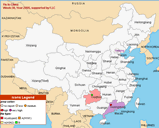

In [40]:
from PIL import Image
Image.open('global.gif')

# 抓pdf檔

In [1]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.cdc.gov/mmwr/index2021.html')
soup  = BeautifulSoup(res.text, 'html.parser')

In [7]:
# domain = 'https://www.cdc.gov'
# for alink in soup.select('a'):
    # if alink.get('href') and 'pdf' in alink['href']:   #先檢查alink裡面有沒有href，有再檢查pdf字串
        # res = requests.get(domain + alink['href'])
        # with open(alink['href'].split('/')[-1], 'wb') as f:
            # f.write(res.content)

b'%PDF-1.6\r%\xe2\xe3\xcf\xd3\r\n9097 0 obj\r<</Linearized 1/L 1871157/O 9100/E 88268/N 28/T 1866345/H [ 660 800]>>\rendobj\r         \r\n9123 0 obj\r<</DecodeParms<</Columns 5/Predictor 12>>/Filter/FlateDecode/ID[<97869EFBE18D674082DFF641A83E3DFE><2456CEB3A7EB404C80B9AA799B38C549>]/Index[9097 96]/Info 9096 0 R/Length 133/Prev 1866346/Root 9098 0 R/Size 9193/Type/XRef/W[1 3 1]>>stream\r\nh\xdebbd`\x10``b``]\x02"\x19YA$\x83\r\x88d\xf6\x05\x91\xdc\xdbA$\xdf$\x10\xc9\x9b\n\x16\x9f\x05&\xf7\x81H\x1e9\xb0\xec^\xb0\xec/\x10\xc9t\x10,\x12\x04f?\x02\x8b\xaf\x04\x9b\x93\x05"%>\x82H\xa9*\x10\xa9\x0f2\x81Qa\x13\x88\xcd\xd1\x0c"\xd9\xbc@\xa4\xe6\x11\x10)\x0e\xb2\xf1\xff\xea@\x06&F\x06eI\xb0\xab\x18\x18GIJI\xd1ST3\xed?\xc3\xfdO_\x00\x02\x0c\x00u\x95\x17X\r\nendstream\rendobj\rstartxref\r\n0\r\n%%EOF\r\n                                                                                                                       \r\n9192 0 obj\r<</C 887/E 871/Filter/FlateDecode/I 912/Length 692/O 855/S 679/T